In [5]:
# Importing libraries
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the MFCC features dataset
data = pd.read_csv("RAVTESS_MFCC_Observed.csv")

# Display first few rows to confirm structure
print(data.head())

# Separate features and labels
X = data.drop(['emotion'], axis=1)
y = data['emotion']



   Unnamed: 0           0          1          2          3          4  \
0        2004 -448.616730  46.947720 -15.431408  14.031242   3.960403   
1         148 -447.181396  22.572617 -34.142075  10.035789 -15.611120   
2        1774 -498.796722  40.586605  -6.478677   4.476108  -7.414015   
3        1494 -767.249756  71.167816  11.270552  25.242451   8.311923   
4        1567 -513.401672  56.673897 -15.300966  10.099506  -7.582697   

           5          6          7          8  ...        31        32  \
0   0.291582   0.338539   1.090663 -10.118276  ...  0.992721  2.206417   
1 -12.294549  -5.183321 -14.951354  -8.794611  ...  3.493344 -4.002779   
2  -1.774493 -13.756873  -0.302153 -12.894083  ...  2.280825  3.087717   
3  11.256550  -4.271712  -0.281539  -4.234643  ... -1.557784 -2.194302   
4  -9.510823 -13.405409 -16.025616 -11.858650  ...  2.418319  2.085466   

         33        34        35        36        37        38        39  \
0  1.096860  0.294669  0.372524  2.247855

In [6]:
# Encode emotion labels to integers
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

C:\Users\vaibh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:59:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 73.32%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.77      0.77      0.77        78
           2       0.76      0.64      0.69        44
           3       0.65      0.69      0.67        65
           4       0.64      0.72      0.68        68
           5       0.67      0.74      0.71        39
           6       0.76      0.71      0.74        80
           7       0.72      0.65      0.68        43

    accuracy                           0.73       491
   macro avg       0.73      0.72      0.73       491
weighted avg       0.74      0.73      0.73       491



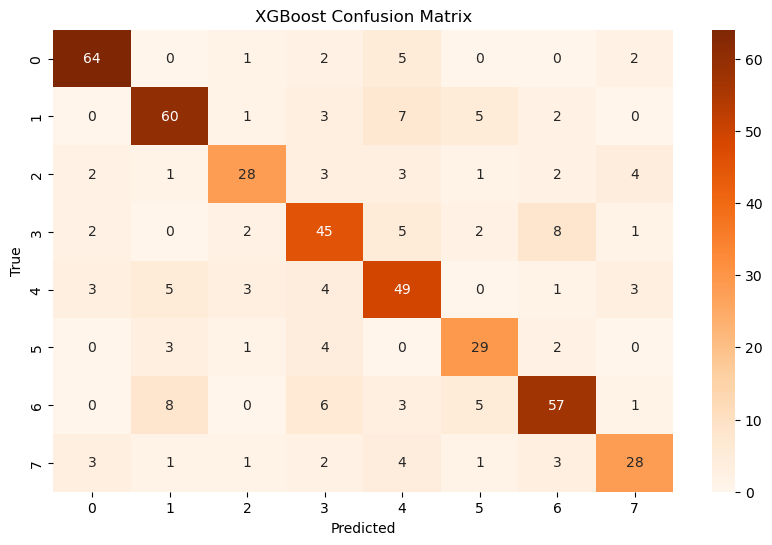

In [7]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100  # convert to percentage
print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
